In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
%matplotlib inline

In [2]:
MAP_NAME = "highbay_best"

In [3]:
csv_files = glob.glob(f'outputs/{MAP_NAME}/*.csv', recursive=True)
csv_files = sorted(csv_files)
csv_files

['outputs/highbay_best/traj_race_cl-2025-02-17 12:50:59.635904.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 12:57:15.091391.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 13:01:10.947620.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 13:42:52.585562.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 13:55:38.717130.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 14:05:47.636158.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 14:07:55.612629.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 14:10:57.968638.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 14:21:08.742534.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 14:23:22.736088.csv',
 'outputs/highbay_best/traj_race_cl-2025-02-17 15:23:41.080804.csv']

In [4]:
raw_data = pd.read_csv(csv_files[-1], header=None, sep=',')
raw_data

,0,1,2
0,-7.378119,3.409709,4.301952
1,-7.426524,3.214548,4.173754
2,-7.475128,3.021276,4.043220
3,-7.524080,2.827192,3.906177
4,-7.572603,2.633001,3.763789
...,...,...,...
183,-7.191629,4.186905,4.333018
184,-7.238214,3.992007,4.419907
185,-7.284466,3.797925,4.499386
186,-7.331226,3.602715,4.516260


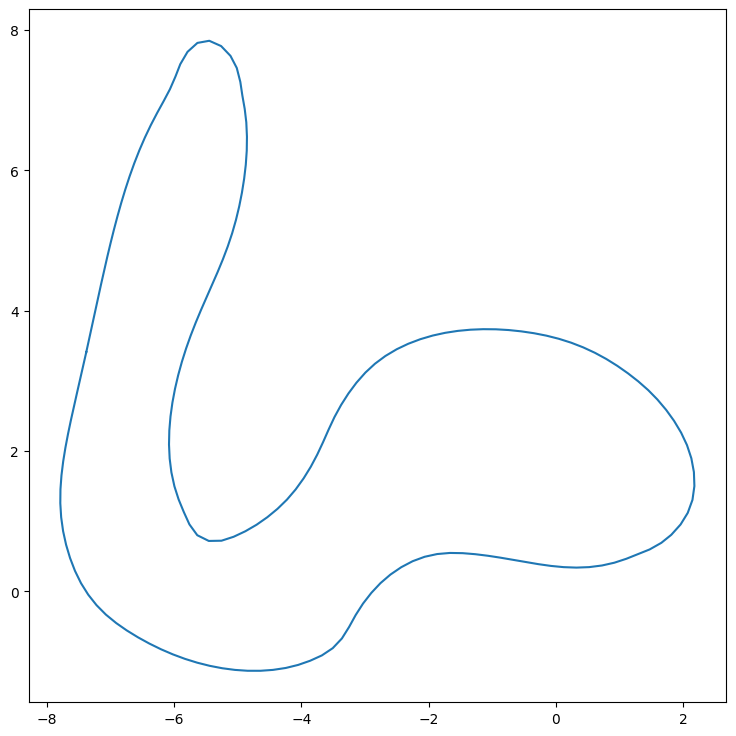

In [5]:
plt.figure(figsize=(9,9))
plt.plot(raw_data.iloc[:, 0], raw_data.iloc[:, 1])

In [6]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"maps/{MAP_NAME}.png"):
    map_img_path = f"maps/{MAP_NAME}.png"
elif os.path.exists(f"maps/{MAP_NAME}.pgm"):
    map_img_path = f"maps/{MAP_NAME}.pgm"
else:
    raise Exception("Map not found!")

map_yaml_path = f"maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# calculate map parameters
orig_x = origin[0]
orig_y = origin[1]
# ??? Should be 0
orig_s = np.sin(origin[2])
orig_c = np.cos(origin[2])

# get the distance transform
transformed_data = raw_data.copy()
transformed_data -= np.array([orig_x, orig_y, 0])
transformed_data.iloc[:, :2] /= map_resolution

raw_map_img = np.array(Image.open(map_img_path).transpose(Image.FLIP_TOP_BOTTOM))
raw_map_img = raw_map_img.astype(np.float64)


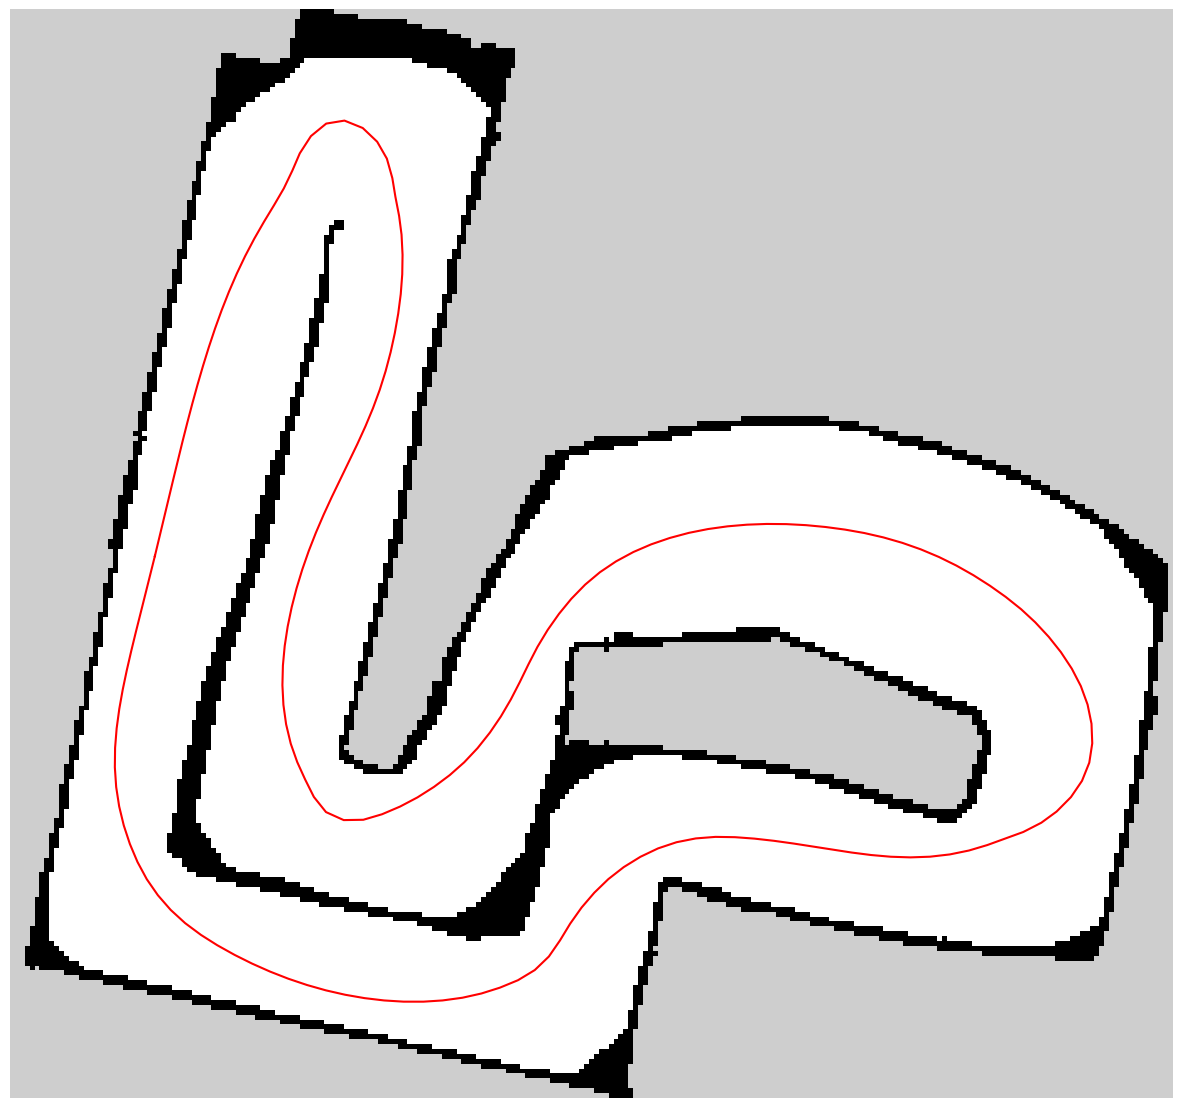

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')
# Save image without the axis
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline.png", bbox_inches='tight', pad_inches=0)

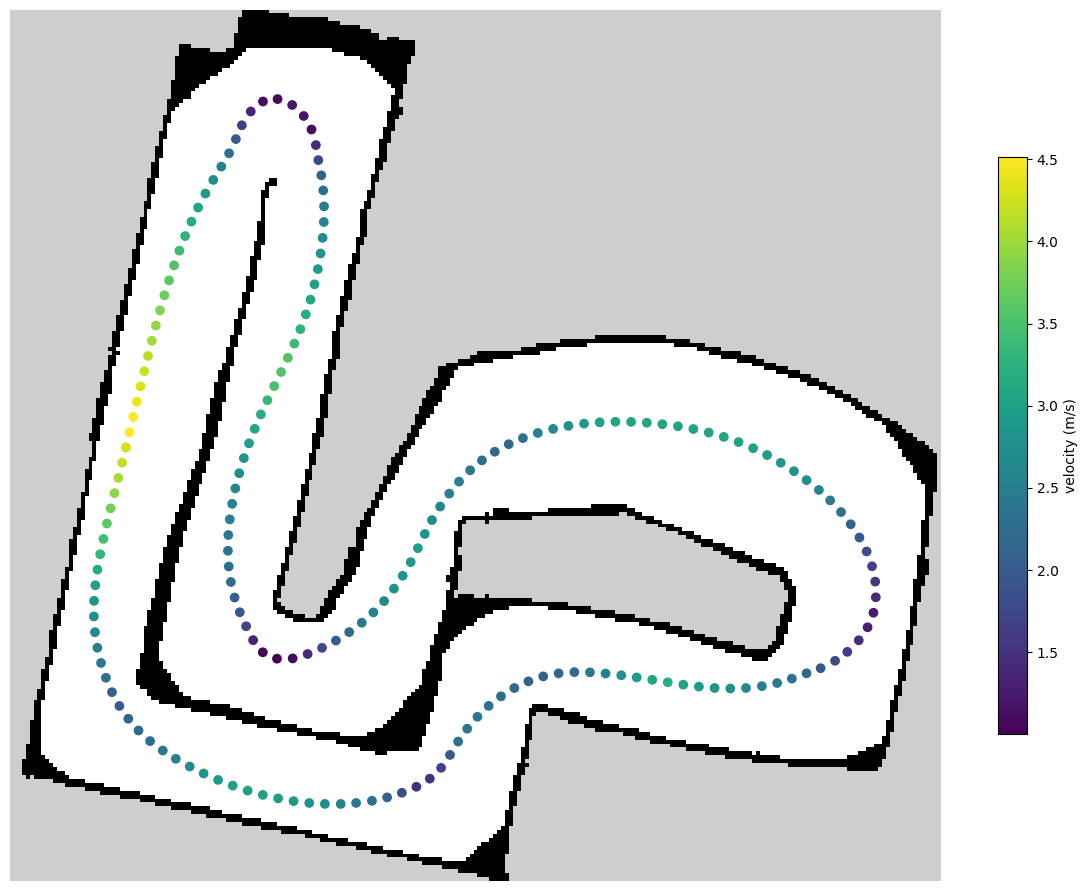

In [8]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline_speed.png", bbox_inches='tight', pad_inches=0)

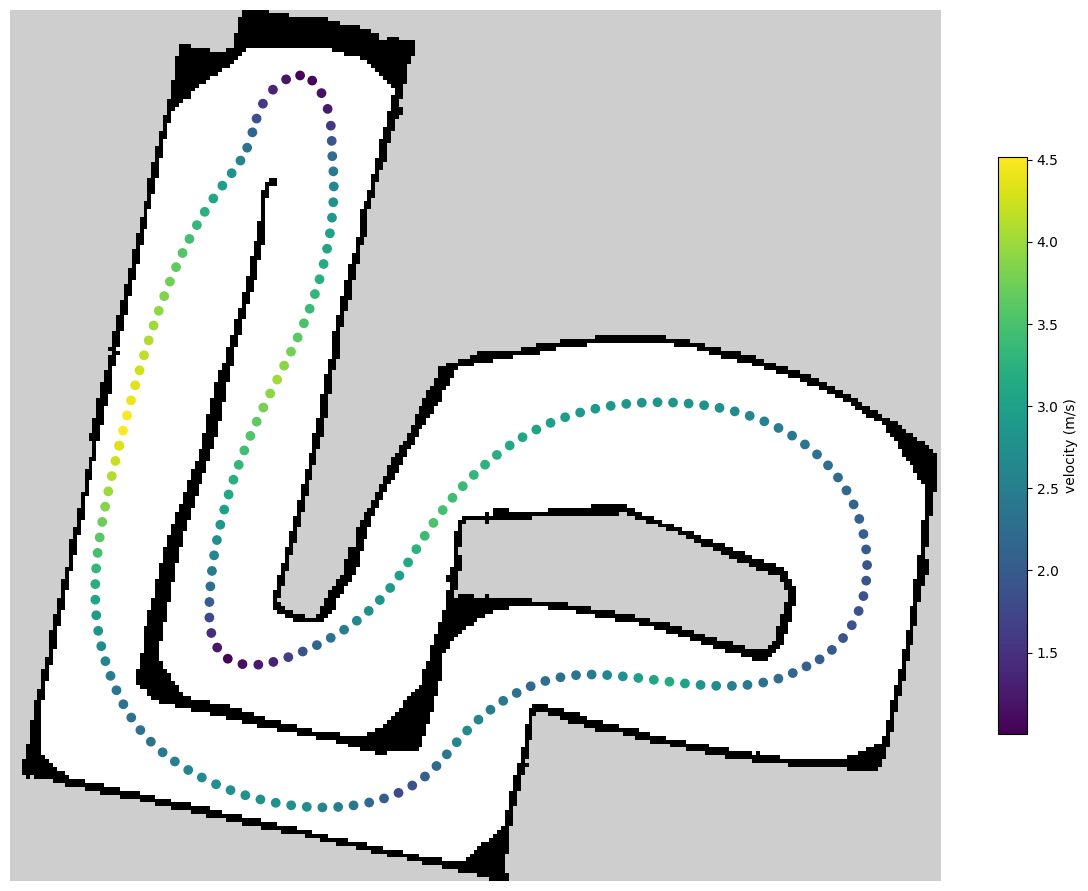

In [32]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline_speed.png", bbox_inches='tight', pad_inches=0)

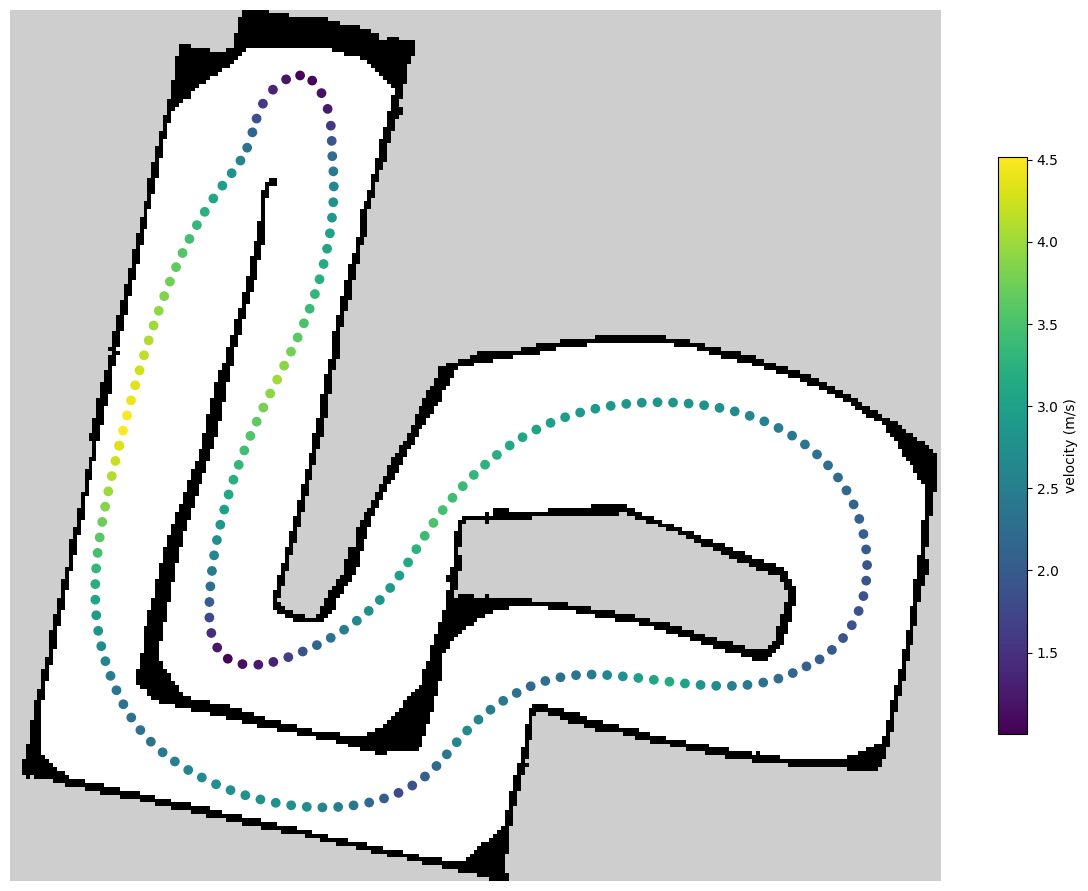

In [33]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline_speed.png", bbox_inches='tight', pad_inches=0)

## (OPTIONAL) Overlay on the original map

In [9]:
ORIG_MAP = f"{MAP_NAME}_RAW"
orig_map_img = np.array(Image.open(f"maps/{ORIG_MAP}.pgm").transpose(Image.FLIP_TOP_BOTTOM))
orig_map_img = orig_map_img.astype(np.float64)
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mocha/Raceline-Optimization/maps/redbullring_RAW.pgm'

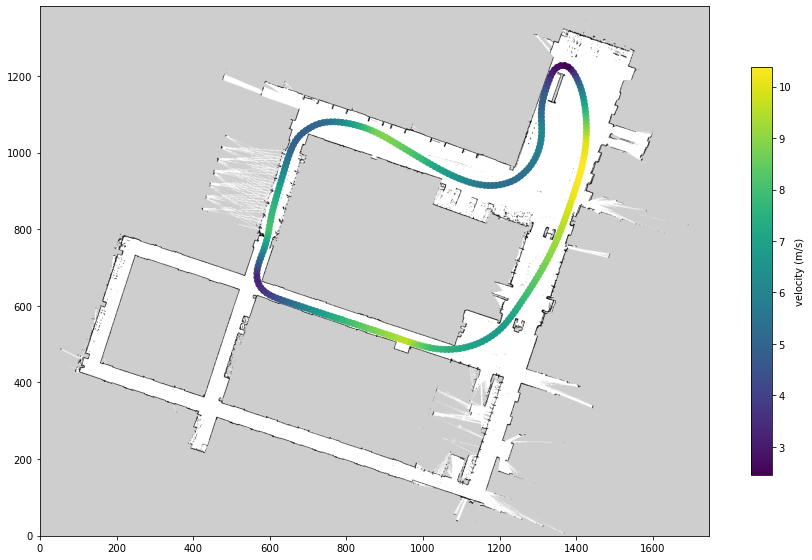

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

## Visualize Velocity Profile in 3D

In [34]:
raw_data_np = transformed_data.to_numpy()

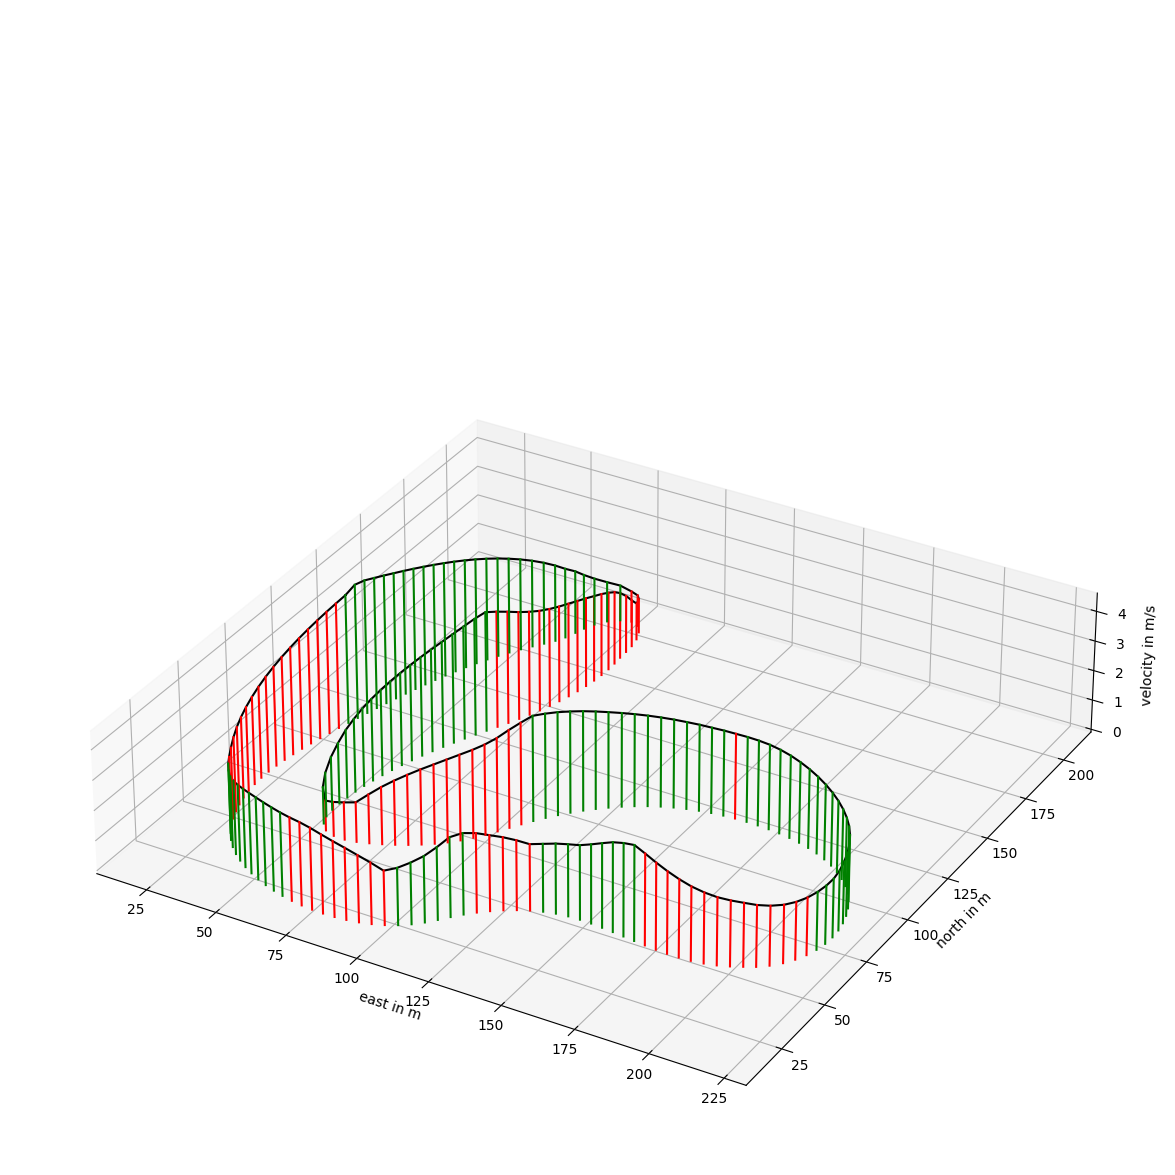

In [35]:
from mpl_toolkits.mplot3d import Axes3D
# Visualize Velocity Profile
scale_x = 1.0
scale_y = 1.0
scale_z = 0.3  # scale z axis such that it does not appear stretched

# create 3d plot

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

# recast get_proj function to use scaling factors for the axes
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1.0]))

ax.grid()
ax.set_aspect("auto")
ax.set_xlabel("east in m")
ax.set_ylabel("north in m")

# Doesn't work
# import matplotlib
# x,y = np.mgrid[0:orig_map_img.shape[0], 0:orig_map_img.shape[1]]
# ax.plot_surface(x,y,np.sin(0*x), facecolors=matplotlib.cm.ScalarMappable(cmap='gray').to_rgba(orig_map_img))

# plot velocity profile in 3D
ax.plot(raw_data_np[:, 0], raw_data_np[:, 1], raw_data_np[:, 2], color="k")
ax.set_zlabel("velocity in m/s")

# plot vertical lines visualizing acceleration and deceleration zones
ind_stepsize = 1
cur_ind = 0
no_points_traj_vdc = np.shape(raw_data_np)[0]
prev_vel = 0
curr_vel = 0

while cur_ind < no_points_traj_vdc - 1:
	curr_vel = raw_data_np[cur_ind, 2]
	x_tmp = [raw_data_np[cur_ind, 0], raw_data_np[cur_ind, 0]]
	y_tmp = [raw_data_np[cur_ind, 1], raw_data_np[cur_ind, 1]]
	z_tmp = [0.0, curr_vel]  # plot line with height depending on velocity

	# get proper color for line depending on acceleration
	if curr_vel - prev_vel > 0.0:
		col = "g"
	elif curr_vel - prev_vel < 0.0:
		col = "r"
	else:
		col = "gray"
	
	prev_vel = curr_vel

	# plot line
	ax.plot(x_tmp, y_tmp, z_tmp, color=col)

	# increment index
	cur_ind += ind_stepsize


plt.show()